In [130]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [131]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [132]:
df.shape

(150, 6)

In [133]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [134]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [135]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [136]:
df.drop(['Id'],axis=1,inplace=True)

In [137]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [138]:
df1=df['Species'].value_counts()
df1

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<BarContainer object of 3 artists>

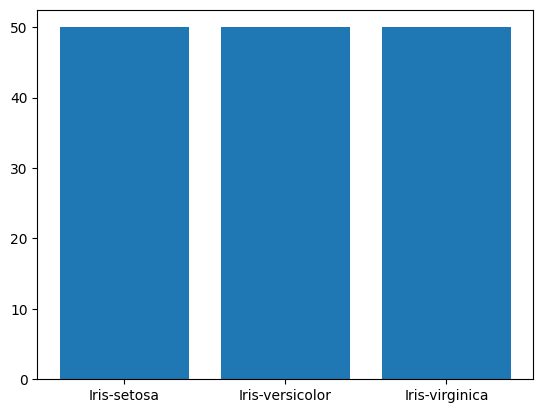

In [139]:
plt.bar(df1.index,df1.values)

In [140]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Species']=lab.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [141]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [142]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [144]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [145]:
from keras.models import Sequential
from keras.layers import Dense 

In [146]:
ann=Sequential()
#input layer
ann.add(Dense(units=4,activation='relu'))
#hidden layers
ann.add(Dense(units=5,activation='relu'))
ann.add(Dense(units=4,activation='relu'))
#output
ann.add(Dense(units=3,activation='softmax'))   #two or more classification so softmax

In [147]:
#compile
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=75,batch_size=10)

Epoch 1/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3524 - loss: 1.0784
Epoch 2/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3524 - loss: 1.0646
Epoch 3/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3524 - loss: 1.0529 
Epoch 4/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3524 - loss: 1.0430 
Epoch 5/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3524 - loss: 1.0337 
Epoch 6/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3524 - loss: 1.0238 
Epoch 7/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3524 - loss: 1.0147 
Epoch 8/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3524 - loss: 1.0053 
Epoch 9/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3524 - loss: 0.9959 
Epoch 10/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3524 - loss: 0.9855 
Epoch 11/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3714 - loss: 0.9747 
Epoch 12/75
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 

In [148]:
ann.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9778 - loss: 0.2046 


[0.2046002298593521, 0.9777777791023254]

In [149]:
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254 (1020.00 B)

 Trainable params: 84 (336.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 170 (684.00 B)

In [150]:
y_new=ann.predict(scaler.transform([[2.3,1,5,3]]))
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


array([[0.00359482, 0.50940895, 0.48699632]], dtype=float32)

In [151]:
#argmax
ind=y_new.argmax()
ind

np.int64(1)

In [152]:
pred=lab.inverse_transform([ind])
pred

array(['Iris-versicolor'], dtype=object)

In [153]:
y_pred1=ann.predict(x_test)
y_pred2=y_pred1.argmax(axis=1)
y_pred2


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step 


array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])